In [ ]:
'''
Solve the Linear Regression algorithm of M.L using the given
dataset CarPrice_Assignment..csv
1) The target variable is “price”
2) Split the data into training and testing parts : 80% for
training and 20% for testing.
3) Note down the output of your program for the following :
i) Accuracy
ii) Plot graph for best fit line
iii) Prediction Price for feature matrix :
[5,2,1,0,1,0,2,0,24,22,8,1,92,0,2,9,5,23,4,23,5,10,8,10]
5) Write these values within comments at the end of your
source code.
6) Submit the source code to the google classroom.
'''


In [3]:
import pandas as pd
df = pd.read_csv('CarPrice.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
X = df.drop(["car_ID","price"],axis=1)
y = df['price']
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col].astype(str))
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

X


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,5,2,1,0,1,0,2,0,24,22,...,2,9,5,23,4,23,5,10,8,10
1,5,3,1,0,1,0,2,0,24,22,...,2,9,5,23,4,23,5,10,8,10
2,3,1,1,0,1,2,2,0,32,29,...,3,19,5,1,28,23,20,10,6,9
3,4,4,1,0,0,3,1,0,52,45,...,2,2,5,13,25,0,2,16,11,13
4,4,5,1,0,0,3,0,0,50,45,...,1,13,5,13,25,15,8,16,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,139,1,0,0,3,2,0,15,63,...,2,15,5,35,15,30,7,15,10,11
201,0,138,1,1,0,3,2,0,15,63,...,2,15,5,35,15,21,23,14,6,8
202,0,140,1,0,0,3,2,0,15,63,...,3,24,5,26,7,22,13,16,5,6
203,0,142,0,1,0,3,2,0,15,63,...,3,16,3,6,25,9,3,8,13,10


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [9]:
from sklearn.linear_model import LinearRegression
result = LinearRegression()
result.fit(X_train, y_train)

LinearRegression()

In [10]:
predictions = result.predict(X_test)
predictions

array([ 80.61401177,  59.87125194, 167.86462205, 111.11316659,
       122.07267069, 141.80871928,  20.45918816, 176.72649221,
        20.0483062 ,  91.25426806,  31.16190755,  53.01991537,
       137.70984592,  79.44075533, 137.23068249,  24.29731857,
       129.73861228, 116.03887985,  75.94195868,  20.24055337,
       104.89576658,  36.57372796,  14.77526527,  28.86355889,
       140.78865514,  51.3155089 ,  95.49736046, 161.34624786,
       123.55160601,  77.72938122,  90.48090767,  16.24168903,
        71.47622855, 145.46175826,  23.23527931,  99.96195648,
        23.88519618, 176.47888803,  20.8923685 ,  70.99954041,
       123.61256795])

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)


0.8518466558179694

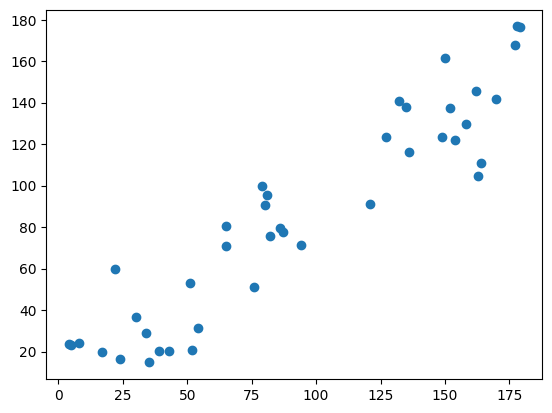

In [13]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

In [14]:
pred_new=result.predict([[5,2,1,0,1,0,2,0,24,22,8,1,92,0,2,9,5,23,4,23,5,10,8,10]])
pred_new


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([126.50842976])